In [3]:
import os
from lstm_mirror import *
from torch import optim
import seaborn
seaborn.set()
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import LightSource, Normalize
from torch.nn import functional as F
import json

# train

In [4]:
init_seed()
hdim = 100
mdl = LSTM(6 + 1, 6, hdim)
logs = train(mdl, 40000, 200, 100)

{'#seqs': 399, 'acc': 0.2862, 'acc_along': [0.245, 0.285, 0.28, 0.335], 'loss': 1.7931, 'seen%': 0.27}
{'#seqs': 799, 'acc': 0.44, 'acc_along': [0.32, 0.335, 0.53, 0.575], 'loss': 1.5096, 'seen%': 0.44}
{'#seqs': 1199, 'acc': 0.435, 'acc_along': [0.34, 0.375, 0.425, 0.6], 'loss': 1.3316, 'seen%': 0.58}
{'#seqs': 1599, 'acc': 0.47, 'acc_along': [0.475, 0.435, 0.445, 0.525], 'loss': 1.2034, 'seen%': 0.69}
{'#seqs': 1999, 'acc': 0.4812, 'acc_along': [0.565, 0.41, 0.395, 0.555], 'loss': 1.1177, 'seen%': 0.77}
{'#seqs': 2399, 'acc': 0.5688, 'acc_along': [0.685, 0.44, 0.45, 0.7], 'loss': 1.0479, 'seen%': 0.83}
{'#seqs': 2799, 'acc': 0.5075, 'acc_along': [0.59, 0.375, 0.375, 0.69], 'loss': 0.9629, 'seen%': 0.88}
{'#seqs': 3199, 'acc': 0.6462, 'acc_along': [0.87, 0.495, 0.425, 0.795], 'loss': 0.8991, 'seen%': 0.91}
{'#seqs': 3599, 'acc': 0.6962, 'acc_along': [0.835, 0.545, 0.6, 0.805], 'loss': 0.7826, 'seen%': 0.93}
{'#seqs': 3999, 'acc': 0.7388, 'acc_along': [0.955, 0.61, 0.52, 0.87], 'loss':

{'#seqs': 34399, 'acc': 1.0, 'acc_along': [1.0, 1.0, 1.0, 1.0], 'loss': 0.0006, 'seen%': 1.0}
{'#seqs': 34799, 'acc': 1.0, 'acc_along': [1.0, 1.0, 1.0, 1.0], 'loss': 0.0005, 'seen%': 1.0}
{'#seqs': 35199, 'acc': 1.0, 'acc_along': [1.0, 1.0, 1.0, 1.0], 'loss': 0.0004, 'seen%': 1.0}
{'#seqs': 35599, 'acc': 1.0, 'acc_along': [1.0, 1.0, 1.0, 1.0], 'loss': 0.0004, 'seen%': 1.0}
{'#seqs': 35999, 'acc': 1.0, 'acc_along': [1.0, 1.0, 1.0, 1.0], 'loss': 0.0003, 'seen%': 1.0}
{'#seqs': 36399, 'acc': 1.0, 'acc_along': [1.0, 1.0, 1.0, 1.0], 'loss': 0.0003, 'seen%': 1.0}
{'#seqs': 36799, 'acc': 1.0, 'acc_along': [1.0, 1.0, 1.0, 1.0], 'loss': 0.0002, 'seen%': 1.0}
{'#seqs': 37199, 'acc': 1.0, 'acc_along': [1.0, 1.0, 1.0, 1.0], 'loss': 0.0002, 'seen%': 1.0}
{'#seqs': 37599, 'acc': 1.0, 'acc_along': [1.0, 1.0, 1.0, 1.0], 'loss': 0.0002, 'seen%': 1.0}
{'#seqs': 37999, 'acc': 1.0, 'acc_along': [1.0, 1.0, 1.0, 1.0], 'loss': 0.0002, 'seen%': 1.0}
{'#seqs': 38399, 'acc': 1.0, 'acc_along': [1.0, 1.0, 1.0, 1.

In [5]:
mdl_name = f'lstm-clf-mirror-mky-whole.mdl'
torch.save(mdl, mdl_name)
log_name = 'lstm-clf-mirror-mky-whole.log'
with open(log_name, 'w') as f:
    logs_json = json.dumps(logs)
    json.dump(logs_json, f)

In [9]:
train_curve = np.array([log['acc_along'] for log in logs])
train_curve.shape
nseqs = [log['#seqs'] for log in logs]
losses = [log['loss'] for log in logs]

In [10]:
def draw_training_curve(logs, kept=0.5):
    nlogs_kept = int(kept * len(logs))
    acc_along = np.array([log['acc_along'] for log in logs])[:nlogs_kept]
    # acc_along: (nseqs, 4)
    nseqs = [log['#seqs'] for log in logs][:nlogs_kept]
    losses = [log['loss'] for log in logs][:nlogs_kept]
    fig, ax = plt.subplots()
    fig.dpi = 100
    for i in range(train_curve.shape[-1]):
        plt.plot(nseqs, acc_along[:, i], label=f'pos {i}')
    plt.plot(nseqs, losses, label=f'loss')
    plt.legend()
    plt.ylabel('Accuracy')
    plt.xlabel('#sequences')
    plt.show()
    return acc_along.mean(axis=0)

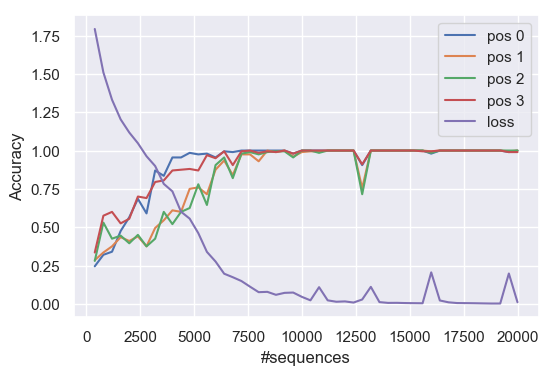

array([0.9114, 0.8467, 0.8468, 0.9144])

In [11]:
draw_training_curve(logs)

([<matplotlib.axis.YTick at 0x1a2028f588>,
 <a list of 4 Text yticklabel objects>)

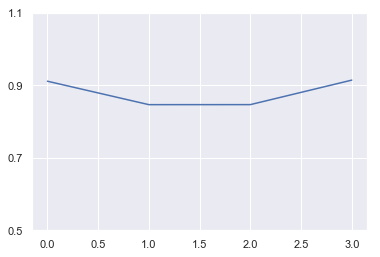

In [33]:
plt.plot(np.arange(4), np.array([0.9114, 0.8467, 0.8468, 0.9144]))
plt.yticks(np.arange(0.5, 1.2, 0.2))

# analysis

In [13]:
mdl = torch.load('lstm-clf-mirror-mky-whole.mdl')

In [14]:
inp_set = []
name_lst = []
for x0 in range(6):
    for x1 in range(6):
        for x2 in range(6):
            for x3 in range(6):
                inp = build_batch(x0, x1, x2, x3)
                inp_set.append(inp)
                name_lst.append(f'{x0}{x1}{x2}{x3}')

In [37]:
def plot(hs, dpi=80, fontsize=10, grid=False, add_cbar=True, show_ylabel=True, title=None):
    bsz, seq_len, hdim = hs.shape
    fig, ax = plt.subplots()
    fig.dpi = dpi
    im = ax.imshow(hs.detach().numpy()[0].transpose(), 
                   interpolation='gaussian')  # (hdim, seq_len)
    if add_cbar:
        cbar = ax.figure.colorbar(im, ax=ax)
    plt.grid(grid)
    plt.xticks([0, 1, 2, 3, 4])
#     plt.xticks(list(range(seq_len)), fontsize=fontsize)
    plt.xlabel('time step')
    if show_ylabel:
        plt.ylabel('dimension/cell index')
    if title is not None:
        plt.title(title)
    plt.show()

In [38]:
def build_batch(x0, x1, x2, x3):
    seq = torch.LongTensor([[x0, x1, x2, x3]])
    seq = embeddings(seq)
    idim = 6 + 1
    width = idim - 1
    seq_len = 4
    inp = torch.zeros(1, seq_len + 1, width + 1)
    inp[:, :seq_len, :width] = seq
    inp[:, seq_len, width] = 1.0  # delimiter in our control channel
    return inp.float()

In [39]:
def build_and_plot(x0, x1, x2, x3, to_plot='hs'):
    inp = build_batch(x0, x1, x2, x3)
    mdl(inp, 4)
    plot(mdl.get_hs(to_plot), 300, 2)

In [40]:
def round_arr(arr, precision=3):
    assert len(arr.shape) == 2
    res = np.zeros(arr.shape)
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            res[i, j] = round(arr[i, j], precision)
    return res

In [41]:
embeddings.weight.requires_grad = True
inp = build_batch(0, 1, 2, 3)
tar = mdl(inp, 4, retain_grad=True)

In [42]:
def grad_tar2inp(x0, x1, x2, x3, tar_pos, 
                 apply_abs=False, add_cbar=True, show_ylabel=True):
    inp = build_batch(x0, x1, x2, x3)
#     print(inp[0].t())
    tar = mdl(inp, 4, retain_grad=True)
    tar = F.softmax(tar, dim=-1)
    print(round_arr(tar[0].t().detach().numpy()))
    # tar: (bsz, seq_len, odim)
    tar[0, tar_pos].max().backward()
#     tar[0, tar_pos].abs().sum().backward()
#     plot(inp.grad.abs(), grid=True)
    if apply_abs:
        plot(inp.grad.abs(), grid=True, add_cbar=add_cbar, show_ylabel=show_ylabel)
    else:
        plot(inp.grad, grid=True, add_cbar=add_cbar, show_ylabel=show_ylabel)

In [43]:
F.softmax(tar, dim=-1).max(dim=-1)

(tensor([[0.9999, 1.0000, 1.0000, 1.0000]], grad_fn=<MaxBackward0>),
 tensor([[3, 2, 1, 0]]))

target position 0
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


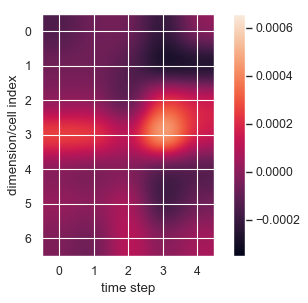

target position 1
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


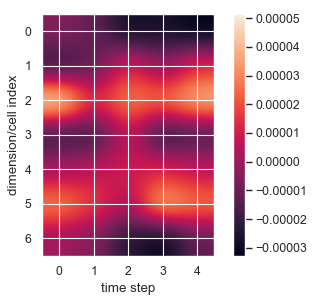

target position 2
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


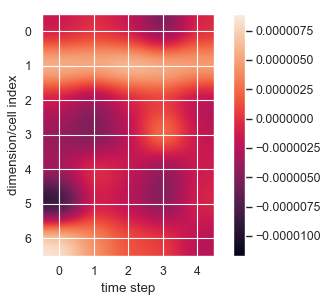

target position 3
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


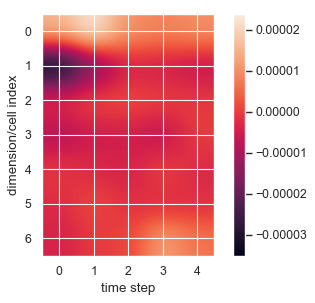

In [44]:
for tar_pos in range(4):
    print(f'target position {tar_pos}')
    grad_tar2inp(0, 1, 2, 3, tar_pos, add_cbar=True)

target position 0
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


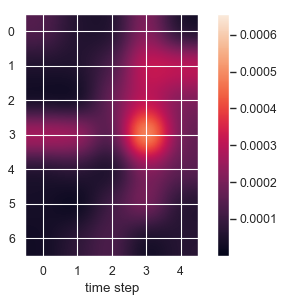

target position 1
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


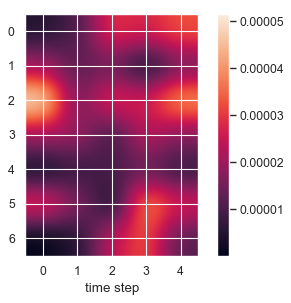

target position 2
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


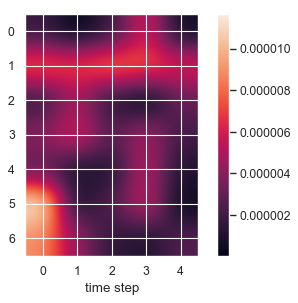

target position 3
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


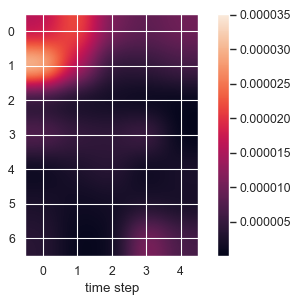

In [45]:
for tar_pos in range(4):
    print(f'target position {tar_pos}')
    grad_tar2inp(0, 1, 2, 3, tar_pos, apply_abs=True, show_ylabel=False)

# 门控

In [49]:
def saturated_ratio(gate_name, ax):
    gate_l_lst = []
    gate_r_lst= []
    for x0 in range(6):
        for x1 in range(6):
            for x2 in range(6):
                for x3 in range(6):
                    inp = build_batch(x0, x1, x2, x3)
                    tar = mdl(inp, 4)
#                     print(f'{x0}{x1}{x2}{x3}')
                    gate = mdl.get_hs(gate_name)
                    gate = mdl.get_hs(gate_name)  # (bsz=1, ilen + tlen, hdim)
                    gate_l = gate.le(0.1)
                    gate_r = gate.ge(0.9)
                    gate_l_lst.append(gate_l)
                    gate_r_lst.append(gate_r)
    gate_l_lst = torch.cat(gate_l_lst, dim=0)  # (nseqs, ilen + tlen, hdim)
    gate_r_lst = torch.cat(gate_r_lst, dim=0)  # (nseqs, ilen + tlen, hdim)
    ratio_l = gate_l_lst.sum(dim=-1).float() / gate_l_lst.shape[-1]  # (nseqs, ilen + tlen)
    ratio_r = gate_r_lst.sum(dim=-1).float() / gate_r_lst.shape[-1]
    ratio_l = ratio_l.detach().numpy()
    ratio_r = ratio_r.detach().numpy()
    res = ax.errorbar(x=list(range(ratio_l.shape[1])), 
                      y=np.mean(ratio_l, axis=0), 
                      yerr=np.std(ratio_l, axis=0), 
                      label=f'{gate_name}-left',
                      marker='<')
    ax.errorbar(x=list(range(ratio_r.shape[1])), 
                y=np.mean(ratio_r, axis=0), 
                yerr=np.std(ratio_r, axis=0), 
                color=res[0].get_color(),
                label=f'{gate_name}-right',
                marker='>')

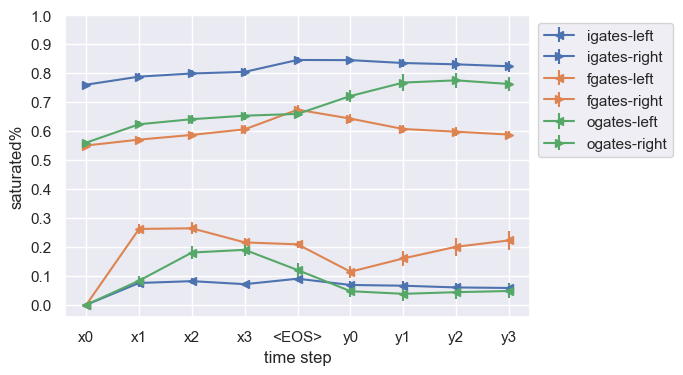

In [50]:
mdl = torch.load('lstm-clf-mirror-mky-whole.mdl')
fig, ax = plt.subplots()
fig.dpi = 100
saturated_ratio('igates', ax)
saturated_ratio('fgates', ax)
saturated_ratio('ogates', ax)
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(list(range(4 + 1 + 4)), ['x0', 'x1', 'x2', 'x3', '<EOS>', 'y0', 'y1', 'y2', 'y3'])
plt.xlabel('time step')
plt.ylabel('saturated%')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

In [46]:
def mean_gate(gate_name, ax):
    gate_lst = []
    for x0 in range(6):
        for x1 in range(6):
            for x2 in range(6):
                for x3 in range(6):
                    inp = build_batch(x0, x1, x2, x3)
                    tar = mdl(inp, 4)
                    gate = mdl.get_hs(gate_name)
                    gate_lst.append(gate)
                    
    gate_lst = torch.cat(gate_lst, dim=0)  # (nseqs, ilen + tlen, hdim)
    mean_along_hdim = gate_lst.mean(dim=-1)  # (nseqs, ilen + tlen)
    mean_val = mean_along_hdim.detach().numpy()
    ax.errorbar(x=list(range(mean_val.shape[1])), 
                      y=np.mean(mean_val, axis=0), 
                      yerr=np.std(mean_val, axis=0), 
                      label=f'{gate_name}')

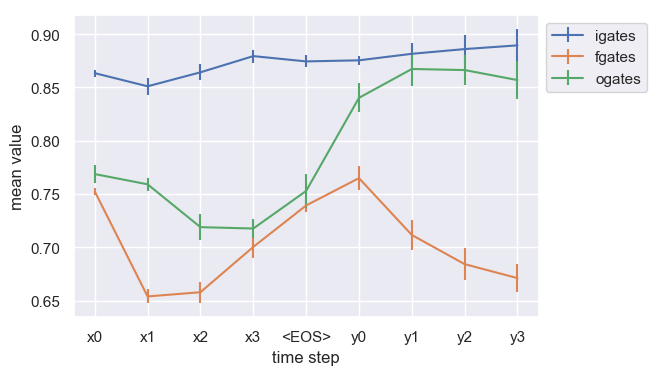

In [48]:
mdl = torch.load('lstm-clf-mirror-mky-whole.mdl')
fig, ax = plt.subplots()
fig.dpi = 100
mean_gate('igates', ax)
mean_gate('fgates', ax)
mean_gate('ogates', ax)
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(list(range(4 + 1 + 4)), ['x0', 'x1', 'x2', 'x3', '<EOS>', 'y0', 'y1', 'y2', 'y3'])
plt.xlabel('time step')
plt.ylabel('mean value')
plt.show()

# 消融

In [52]:
mdl = torch.load('lstm-clf-mirror-mky-whole.mdl')

In [53]:
logs = []
for k in range(100):
    acc_lst = []
    for _ in range(10):
        indices = random.sample(range(100), k=k)
        _, acc = ablation_test(mdl, 200, indices)
        acc_lst.append(acc)
    log = {'k':k, 'acc_mean': np.mean(acc_lst), 'acc_std': np.std(acc_lst)}
    logs.append(log)
    print(log)

{'k': 0, 'acc_mean': 1.0, 'acc_std': 0.0}
{'k': 1, 'acc_mean': 0.9998750000000001, 'acc_std': 0.000374999999999992}
{'k': 2, 'acc_mean': 0.9994999999999999, 'acc_std': 0.0008291561975888323}
{'k': 3, 'acc_mean': 0.9970000000000001, 'acc_std': 0.006204836822995429}
{'k': 4, 'acc_mean': 0.991875, 'acc_std': 0.00861049504964726}
{'k': 5, 'acc_mean': 0.982, 'acc_std': 0.022299103120977794}
{'k': 6, 'acc_mean': 0.97775, 'acc_std': 0.019103337404757316}
{'k': 7, 'acc_mean': 0.985125, 'acc_std': 0.020205584005417932}
{'k': 8, 'acc_mean': 0.978875, 'acc_std': 0.027666823543731962}
{'k': 9, 'acc_mean': 0.9339999999999999, 'acc_std': 0.037909431544142135}
{'k': 10, 'acc_mean': 0.938875, 'acc_std': 0.034243840687049075}
{'k': 11, 'acc_mean': 0.9488749999999999, 'acc_std': 0.04133873032641423}
{'k': 12, 'acc_mean': 0.935875, 'acc_std': 0.03804623010233734}
{'k': 13, 'acc_mean': 0.9315, 'acc_std': 0.02733930320984793}
{'k': 14, 'acc_mean': 0.9055, 'acc_std': 0.049108298687696395}
{'k': 15, 'acc_mea

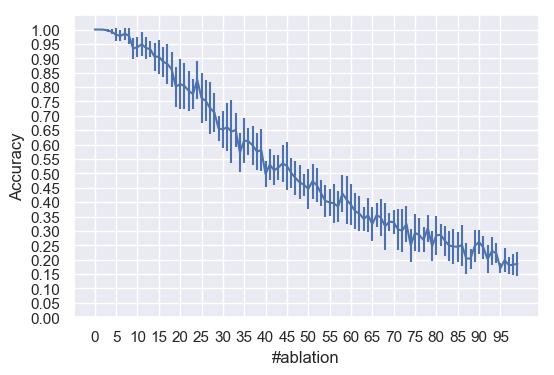

In [54]:
fig, ax = plt.subplots()
fig.dpi = 100
x = [log['k'] for log in logs]
y = [log['acc_mean'] for log in logs]
err = [log['acc_std'] for log in logs]
plt.errorbar(x=x, y=y, yerr=err)
plt.xticks(list(range(0, 100, 5)))
plt.yticks([i * 0.05 for i in range(100 // 5)] + [1])
plt.ylabel('Accuracy')
plt.xlabel('#ablation')
plt.show()

In [59]:
for cidx in range(100):
    acc_along, acc_mean = ablation_test(mdl, 400, cidx)
    if acc_mean != 1:
        print(f'cix {cidx} along {acc_along}, mean {acc_mean}')

cix 0 along [1.0, 1.0, 0.9975, 1.0], mean 0.999375
cix 5 along [1.0, 1.0, 0.995, 1.0], mean 0.99875
cix 25 along [1.0, 0.9975, 0.9925, 0.9975], mean 0.9968750000000001
cix 27 along [1.0, 0.995, 0.99, 0.9975], mean 0.9956250000000001
cix 30 along [1.0, 1.0, 0.9925, 0.9925], mean 0.9962500000000001
cix 31 along [1.0, 0.9975, 1.0, 1.0], mean 0.999375
cix 38 along [1.0, 1.0, 1.0, 0.995], mean 0.99875
cix 39 along [1.0, 1.0, 0.9925, 1.0], mean 0.998125
cix 53 along [1.0, 1.0, 0.995, 0.9875], mean 0.995625
cix 61 along [1.0, 0.9975, 0.9975, 0.9975], mean 0.998125
cix 63 along [1.0, 1.0, 1.0, 0.995], mean 0.99875
cix 69 along [1.0, 1.0, 1.0, 0.9875], mean 0.996875
cix 72 along [0.995, 1.0, 0.9975, 1.0], mean 0.998125
cix 73 along [1.0, 0.9875, 0.9975, 1.0], mean 0.9962500000000001
cix 79 along [1.0, 1.0, 0.9975, 0.995], mean 0.998125
cix 92 along [1.0, 0.9925, 1.0, 1.0], mean 0.998125


In [57]:
for cidx in range(100):
    acc_along, acc_mean = ablation_test(mdl, 400, cidx)
    if acc_mean <= 0.995:
        print(f'cix {cidx} along {acc_along}, mean {acc_mean}')

In [93]:
set_key = [0 ,5 ,25,27,30,31,38,39,53,61,63,69,72,73,79,92]

In [94]:
len(set_key)

16

In [95]:
ablation_test(mdl, 500, set_key)

([0.714, 0.434, 0.272, 0.294], 0.4285)

In [96]:
for cidx in set_key:
    _, acc = ablation_test(mdl, 200, list(set(set_key) - set([cidx])))
    print(cidx, acc)

0 0.45875
5 0.45
25 0.47874999999999995
27 0.48624999999999996
30 0.4525
31 0.475
38 0.43875
39 0.465
53 0.4425
61 0.43625
63 0.45625
69 0.46875
72 0.45375
73 0.50625
79 0.46
92 0.45375


In [92]:
ablation_test(mdl, 200, list(set(set_key) - set([38])))

([0.685, 0.495, 0.265, 0.31], 0.4387500000000001)

# 关键神经元

In [108]:
set_key = [0 ,5 ,25,27,30,31,38,39,53,61,63,69,72,73,79,92]
cs = []
for x0 in range(6):
    for x1 in range(6):
        for x2 in range(6):
            for x3 in range(6):
                inp = build_batch(x0, x1, x2, x3)
                tar = mdl(inp, 4, retain_grad=True)
                c = mdl.get_hs('cs')[:, :, set_key]
                cs.append(c)
cs = torch.cat(cs, dim=0)  # (1296, 4 + 1 +4, 11)

In [109]:
cs.shape

torch.Size([1296, 9, 16])

In [110]:
def crutial_cell_img(cs, tidx, cidx):
    img = cs[:, tidx, cidx].view(36, 36)
    plt.imshow(img.detach().cpu())
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

In [111]:
def crutial_cell_logits(cs, tidx, cidx, w):
    img = cs[:, tidx, cidx].view(36, 36) * w
    plt.imshow(img.detach().cpu())
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

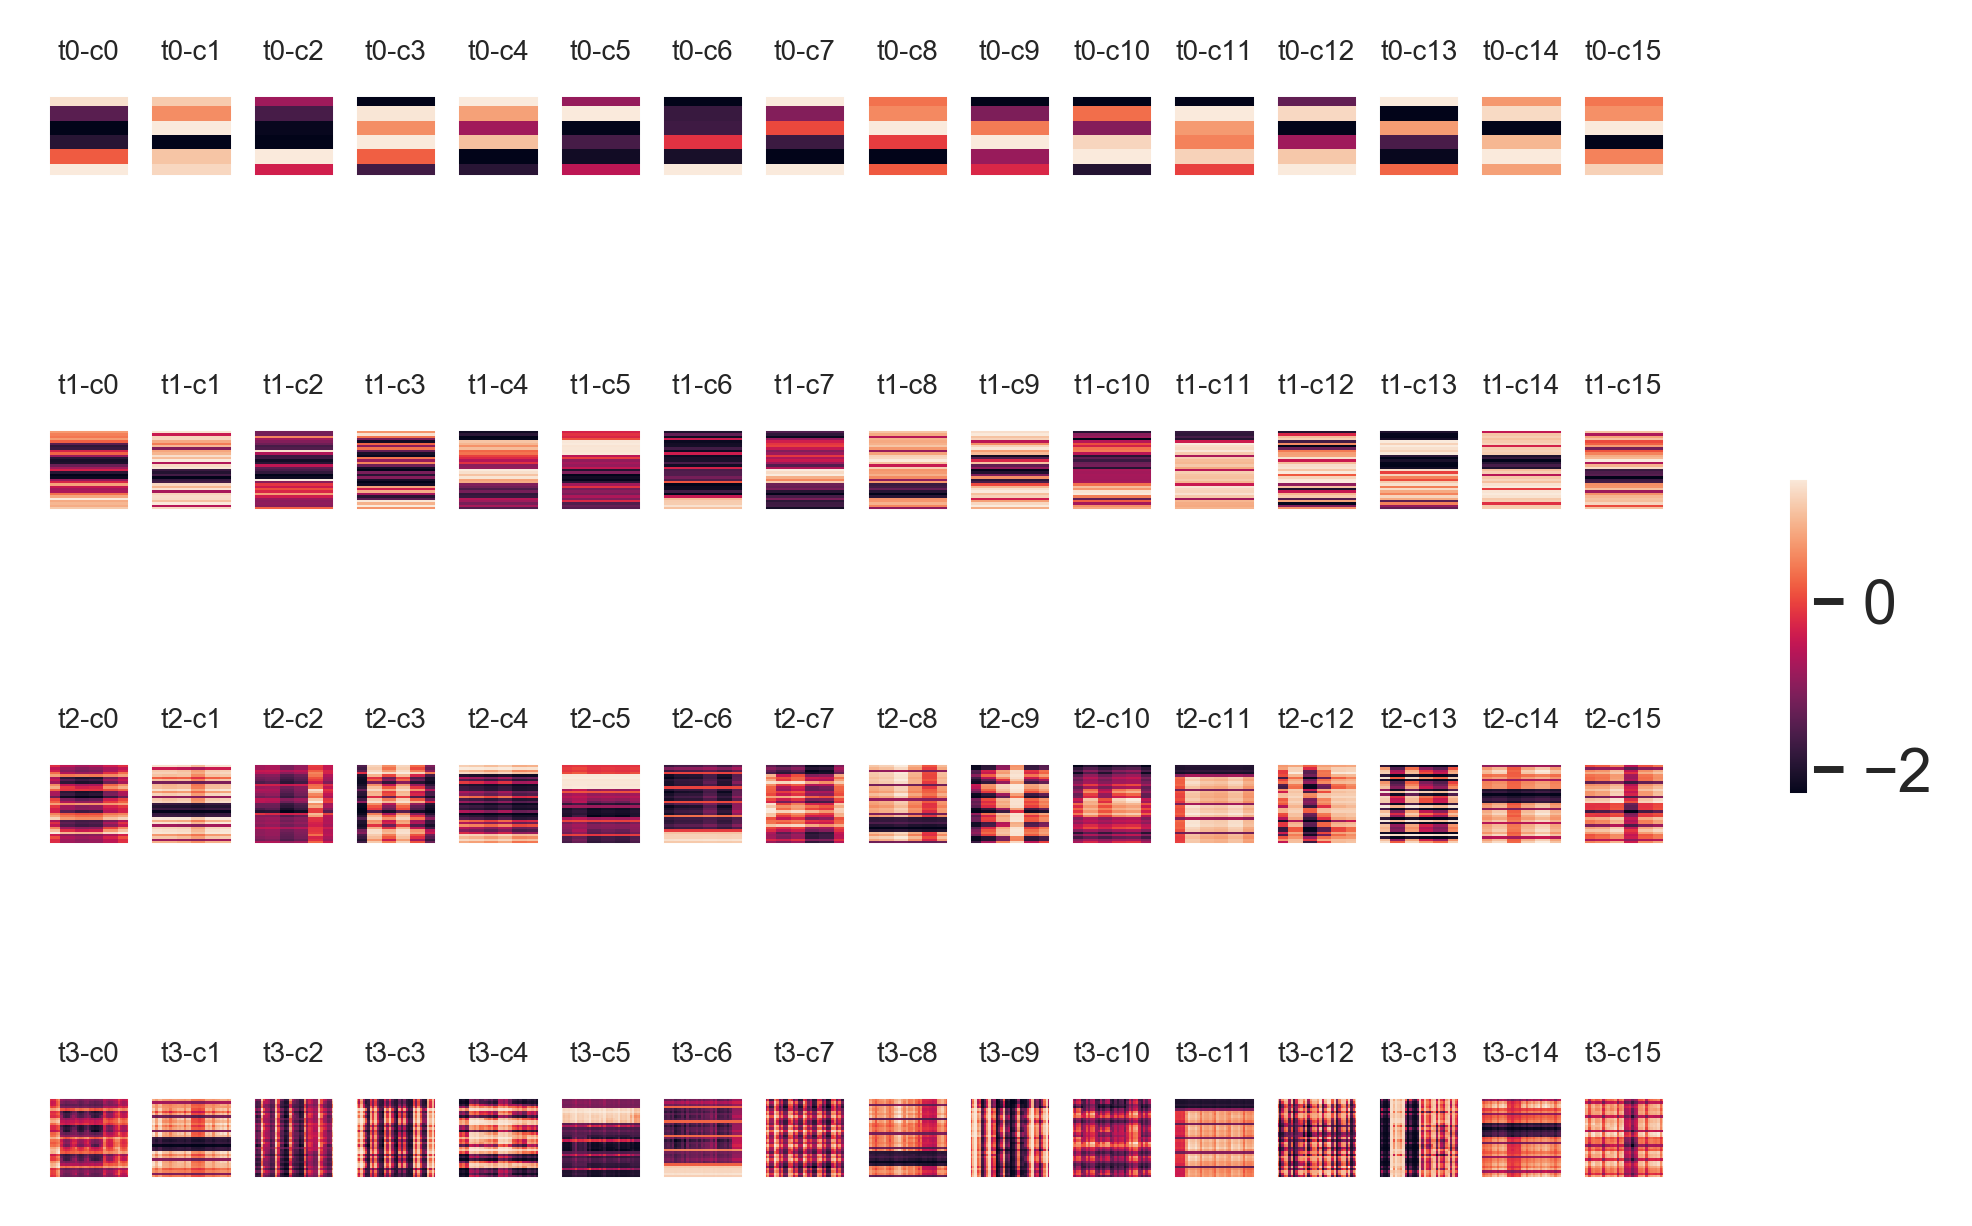

In [113]:
i = 1
fig, _ = plt.subplots()
fig.dpi=400
for tidx in range(4):
    for cidx in range(cs.shape[-1]): 
        plt.subplot(4, cs.shape[-1], i)
        i += 1
        crutial_cell_img(cs, tidx, cidx)
        plt.title(f't{tidx}-c{cidx}', fontsize=5)

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.4, 0.01, 0.2])
plt.colorbar(cax=cax)
plt.show()